In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans,MeanShift
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importing Dataset

In [74]:
df = pd.read_csv("housing.csv")

## EDA

In [75]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


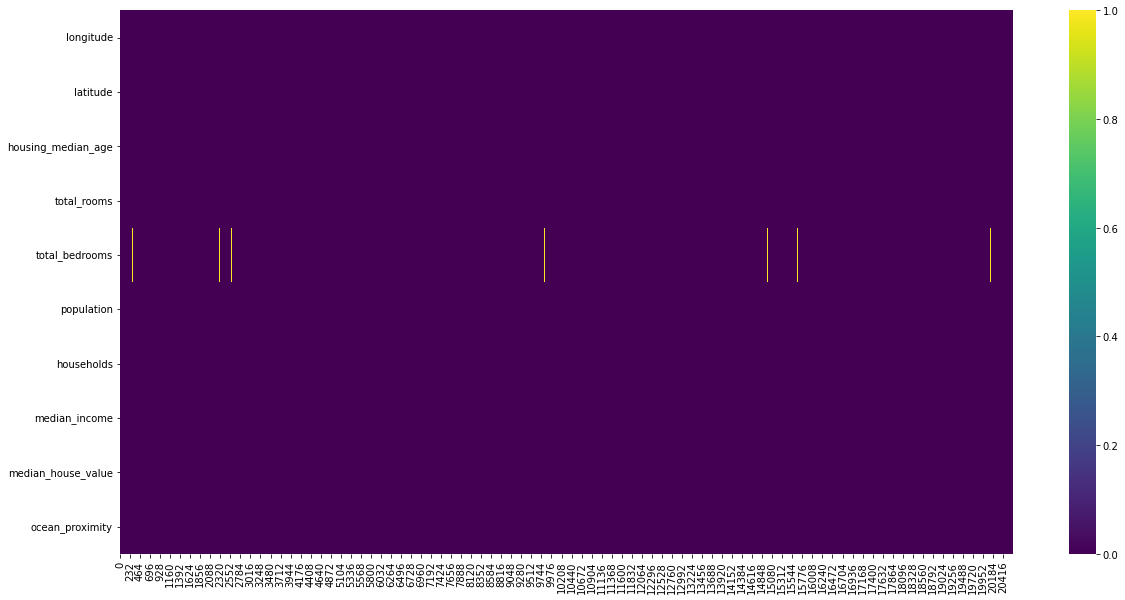

In [79]:
# check nan values
transposed_df = df.transpose().isna()
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(transposed_df, ax = ax, cmap = "viridis")
plt.show()

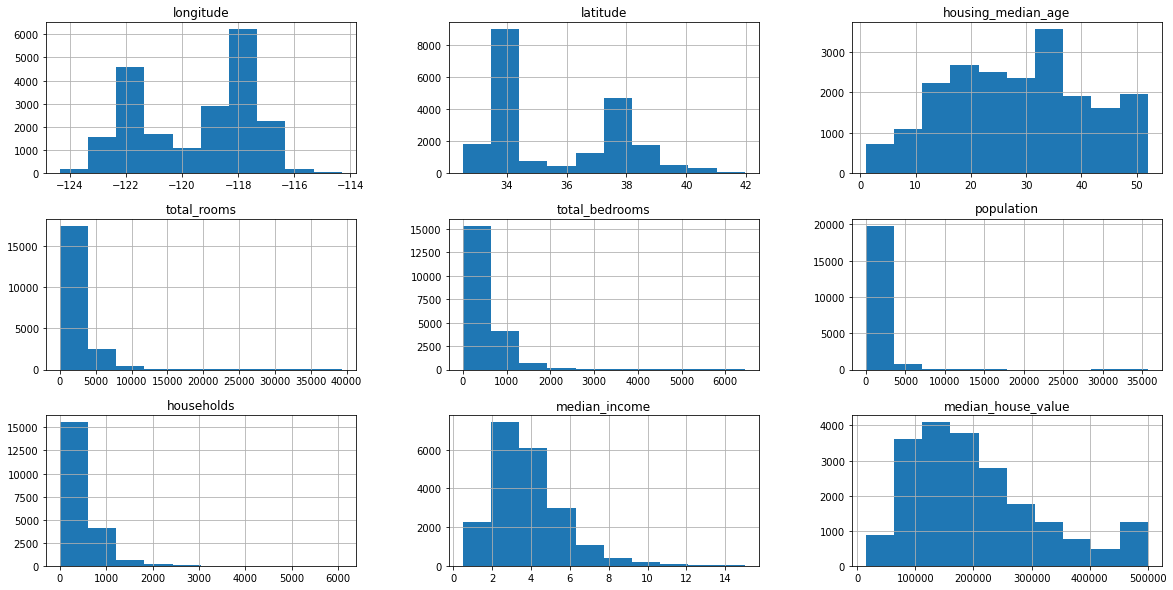

In [80]:
# check distribution
df.hist(figsize = (20,10))
plt.show()

In [81]:
# check relation between ocean_proximity and median_house_value
geo = px.scatter_geo(data_frame = df, lat = "latitude", lon = "longitude", 
                    color = "ocean_proximity", size = "median_house_value",
                    projection = "natural earth")
geo.show() 	

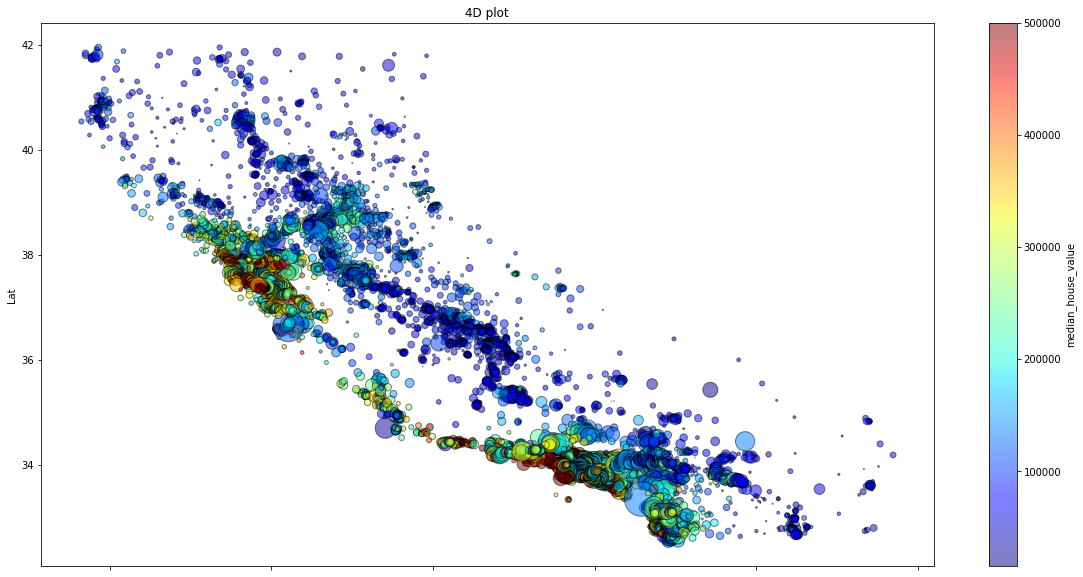

In [82]:
# Color of bubbles means median_house_value
# Size of bubbles means population
df.plot(
    x = "longitude", y = "latitude", kind = 'scatter', edgecolor = 'black',
    alpha = 0.5, c = "median_house_value", colormap= "jet",
    s = df["population"]/30,
    figsize = (20,10), xlabel = "Long", ylabel = "Lat",
    title = "4D plot"
)
plt.show()

## Cleaning

In [83]:
# category to boolian
df = pd.get_dummies(df, columns = ["ocean_proximity"], drop_first = True)

In [84]:
# drop nan values
df = df.dropna(axis = 0)

In [88]:
# select target columns
df_target = df[["latitude", "longitude"]]

## Clustering

### K-Means

In [107]:
# find optimal k using elbow method
elbow_k = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, max_iter = 600)
    kmeans.fit(df_target)
    # squared error
    elbow_k.append([i,kmeans.inertia_])

In [108]:
elbow_k_df = pd.DataFrame(elbow_k, columns = ["n_clusters", "cost"])
elbow_k_df.plot(x = "n_clusters", y = "cost", figsize = (20,10))
plt.show()

TypeError: no numeric data to plot

/tmp/ipykernel_46695/1086366265.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



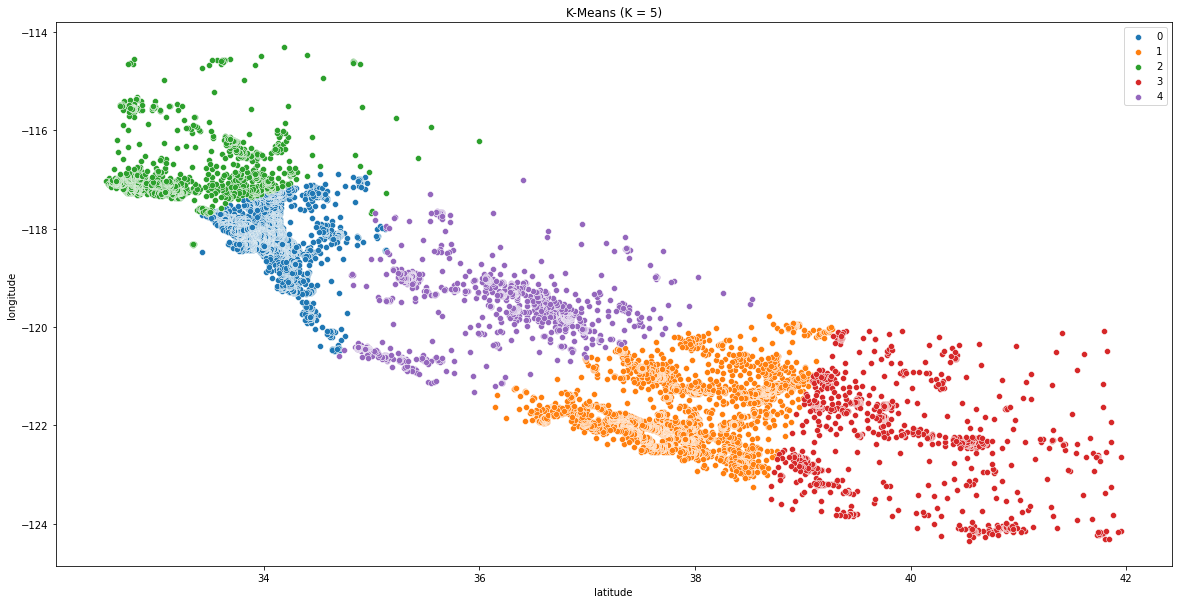

In [128]:
# Five choosen
fig, ax = plt.subplots(figsize = (20,10))
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_target)
kmeans_labels = kmeans.labels_
df_target["labels"] = kmeans.labels_
unique_labels_kmeans = np.unique(kmeans_labels)
for i in range(len(unique_labels_kmeans)):
    sns.scatterplot(df_target[df_target["labels"] == i], x = "latitude", y = "longitude", label = i)
ax.set_title("K-Means (K = 5)")
plt.show()

## DBSCAN

In [123]:
# find optimal epsilon using


/tmp/ipykernel_46695/1765231194.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_46695/1765231194.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



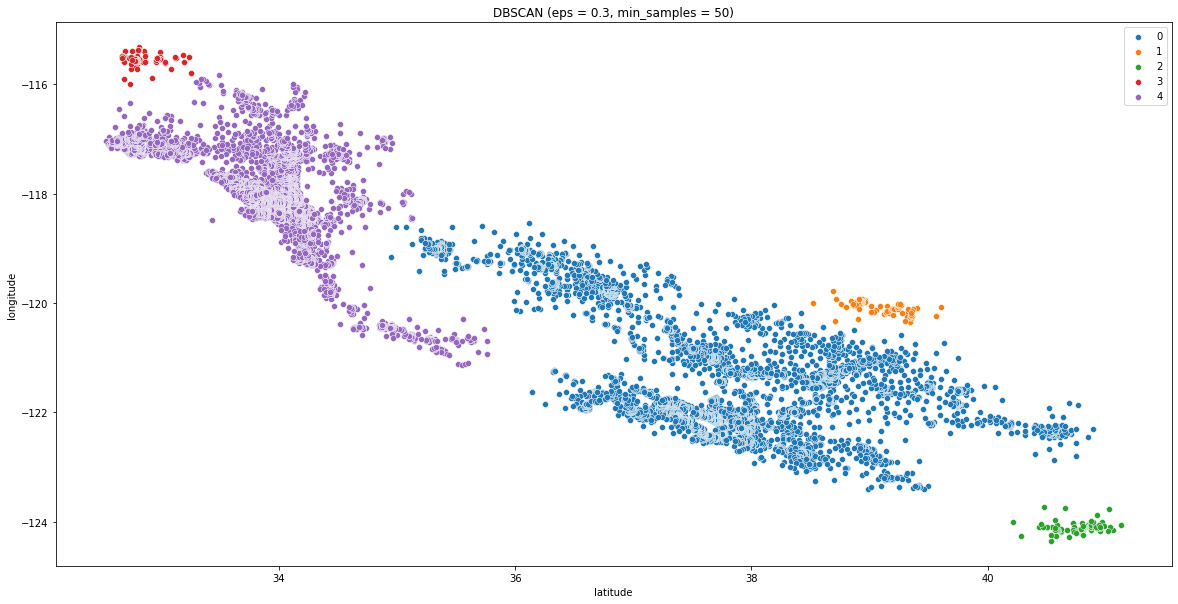

In [136]:
df_target.drop(["labels"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
dbscan_v1 = DBSCAN(eps= 0.3, min_samples = 50)
dbscan_v1.fit(df_target)
dbscan_v1_labels = dbscan_v1.labels_
df_target["labels"] = dbscan_v1.labels_
unique_labels_dbscan_v1 = np.unique(dbscan_v1_labels)
for i in range(len(unique_labels_dbscan_v1)):
    sns.scatterplot(df_target[df_target["labels"] == i], x = "latitude", y = "longitude", label = i)
ax.set_title("DBSCAN (eps = 0.3, min_samples = 50)")    
plt.show()

/tmp/ipykernel_46695/4028351128.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_46695/4028351128.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



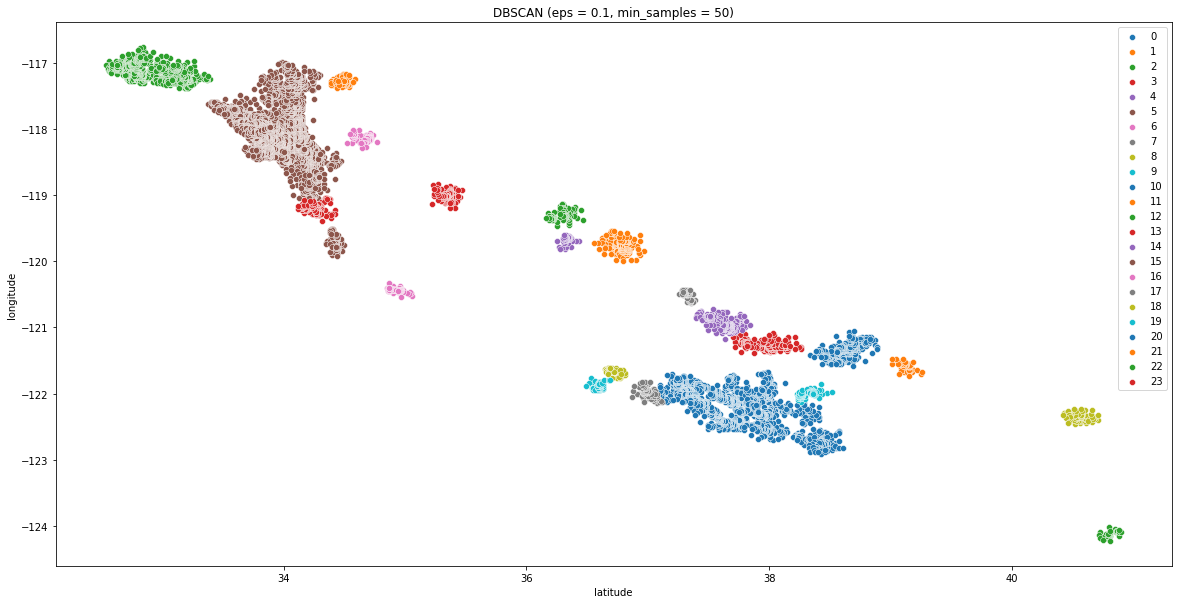

In [137]:
df_target.drop(["labels"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
dbscan_v2 = DBSCAN(eps= 0.1, min_samples = 50)
dbscan_v2.fit(df_target)
dbscan_v2_labels = dbscan_v2.labels_
df_target["labels"] = dbscan_v2.labels_
unique_labels_dbscan_v2 = np.unique(dbscan_v2_labels)
for i in range(len(unique_labels_dbscan_v2)):
    sns.scatterplot(df_target[df_target["labels"] == i], x = "latitude", y = "longitude", label = i)
ax.set_title("DBSCAN (eps = 0.1, min_samples = 50)")    
plt.show()

/tmp/ipykernel_46695/2512773404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_46695/2512773404.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



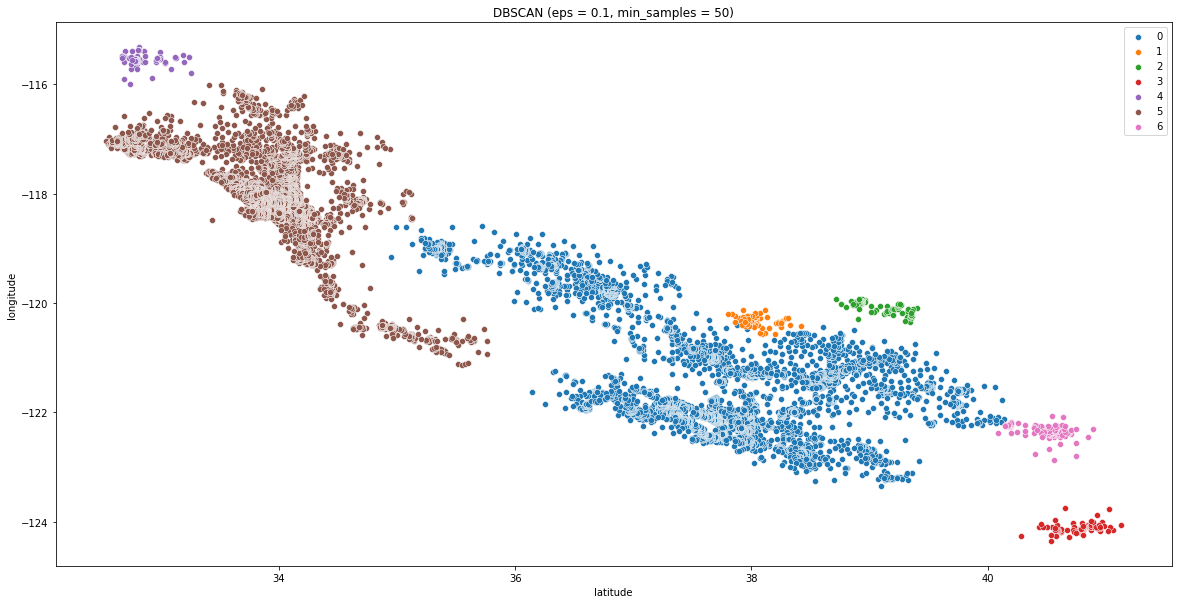

In [145]:
df_target.drop(["labels"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
dbscan_v2 = DBSCAN(eps= 0.3, min_samples = 70)
dbscan_v2.fit(df_target)
dbscan_v2_labels = dbscan_v2.labels_
df_target["labels"] = dbscan_v2.labels_
unique_labels_dbscan_v2 = np.unique(dbscan_v2_labels)
for i in range(len(unique_labels_dbscan_v2)):
    sns.scatterplot(df_target[df_target["labels"] == i], x = "latitude", y = "longitude", label = i)
ax.set_title("DBSCAN (eps = 0.3, min_samples = 70)")    
plt.show()

### MeanShift 

/tmp/ipykernel_46695/277358386.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



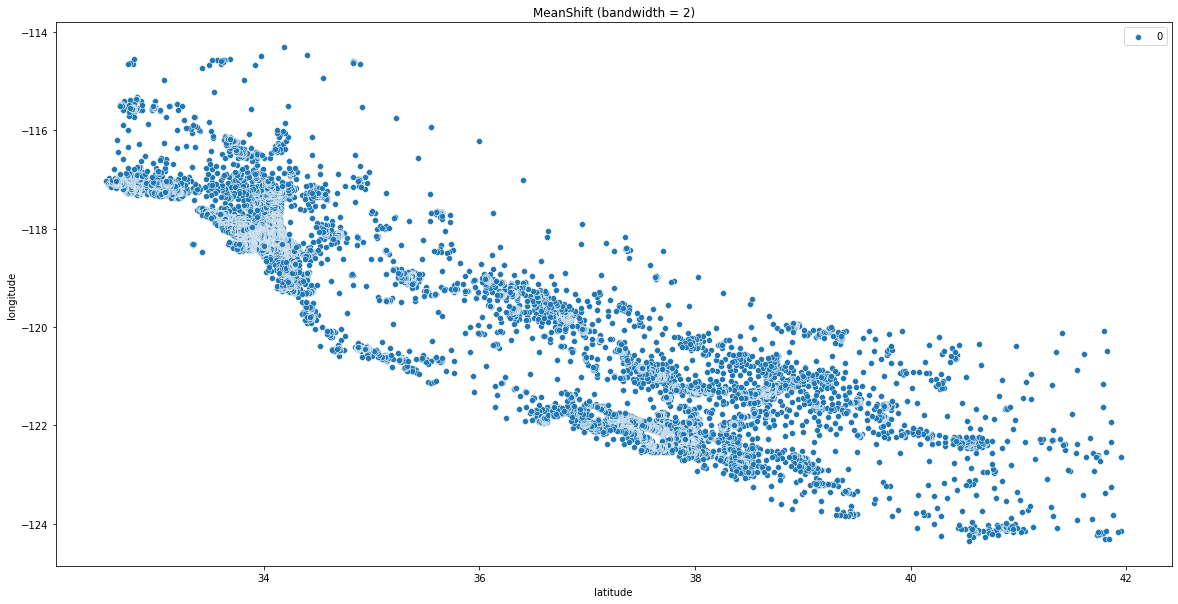

In [149]:
# df_target.drop(["labels"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
meanshift = MeanShift(bandwidth = 100)
meanshift.fit(df_target)
meanshift_labels = meanshift.labels_
df_target["labels"] = meanshift.labels_
unique_labels_meanshift = np.unique(meanshift_labels)
for i in range(len(unique_labels_meanshift)):
    sns.scatterplot(df_target[df_target["labels"] == i], x = "latitude", y = "longitude", label = i)
ax.set_title("MeanShift (bandwidth = 2)")    
plt.show()

In [87]:
# Author : amyrmahdy
# Date: 4 Oct 2022